# VGG-16 재훈련
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 구글 드라이브 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


> ## 2) unzip 'dogs_and_cats_small.zip'

In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [6]:
!ls -l

total 20
drwx------ 5 root root 4096 Aug  6 04:32 drive
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data
drwxr-xr-x 4 root root 4096 Aug  6 04:32 test
drwxr-xr-x 4 root root 4096 Aug  6 04:32 train
drwxr-xr-x 4 root root 4096 Aug  6 04:32 validation


# II. Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [7]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# III. Data Preprocessing

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# IV. Import VGG-16 Model

> ## 1) conv_base

In [9]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


# V. Keras CNN Modeling with VGG-16

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [10]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [12]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 35분

In [13]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 55s 196ms/step - loss: 0.6419 - accuracy: 0.6210 - val_loss: 0.4186 - val_accuracy: 0.8430
Epoch 2/100
100/100 [==============================] - 20s 196ms/step - loss: 0.3325 - accuracy: 0.8575 - val_loss: 0.2190 - val_accuracy: 0.9130
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.1823 - accuracy: 0.9330 - val_loss: 0.2097 - val_accuracy: 0.9170
Epoch 4/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1256 - accuracy: 0.9520 - val_loss: 0.1534 - val_accuracy: 0.9340
Epoch 5/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0903 - accuracy: 0.9630 - val_loss: 0.1348 - val_accuracy: 0.9420
Epoch 6/100
100/100 [==============================] - 20s 197ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.1449 - val_accuracy: 0.9400
Epoch 7/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0444 - accuracy: 0.9845 - val_loss: 0.1481 -

> ## 4) 학습 결과 시각화

* Loss Visualization

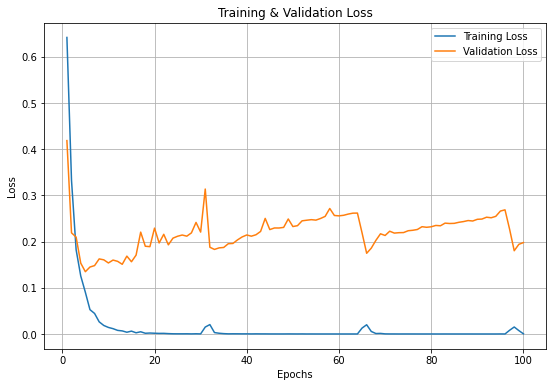

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

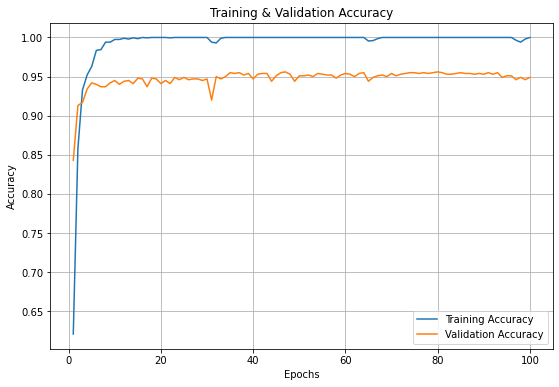

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [17]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 70ms/step - loss: 0.1672 - accuracy: 0.9590
Loss = 0.16718
Accuracy = 0.95900


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## 2) Model Save

In [19]:
model.save('/content/drive/My Drive/Colab Notebooks/models/006_dogs_and_cats_VGG16.h5')

In [20]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 440288
-rw------- 1 root root     34600 Aug  5 23:41 001_Model_iris.h5
-rw------- 1 root root  41498696 Aug  6 00:11 002_dogs_and_cats_small.h5
-rw------- 1 root root  41499544 Aug  6 00:46 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  25199040 Aug  6 04:14 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140748016 Aug  6 01:09 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root 201873000 Aug  6 05:06 006_dogs_and_cats_VGG16.h5


> ## 3) Model Load

In [21]:
from tensorflow.keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/006_dogs_and_cats_VGG16.h5')

In [22]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 71ms/step - loss: 0.1672 - accuracy: 0.9590
Loss = 0.16718
Accuracy = 0.95900


# 
# 
# 
# The End
# 
# 
# 